# Figure 5: Multiple changepoints, evenly spaced with random rate changes

## Python 3 Kernel - Trajectory Simulation

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import numpy as np
import beadpy
import pandas as pd
import itertools

In [2]:
%matplotlib inline

In [3]:
random.seed(53)

In [4]:
def multicpt_defined(event_duration,cpt_separation, meanrate, rate_sigma, noise_sigma,ntraj):
    total_duration = event_duration*ntraj
    ncpt = int(event_duration/cpt_separation)
    total_ncpt = int(ncpt*ntraj)
    ratevalues = np.random.normal(loc=meanrate, scale = rate_sigma, size = total_ncpt)
    ratesequence = np.repeat(ratevalues, cpt_separation)
    position = np.cumsum(ratesequence) #This means each successive trajectory starts off where the last one left, but that doesn't matter for our purposes.
    position_withnoise = np.array(position) + np.random.normal(loc=meanrate, scale = noise_sigma, size = total_duration)
    time = np.tile(range(0, event_duration), ntraj)
    trajseq = np.repeat(range(0,ntraj), event_duration)
    results = pd.DataFrame({'time' : time,
                        'nucleotides' : position_withnoise,
                            'position' : position,
                           'trajectory' : trajseq})
    return results

In [5]:
def multicpt_defined_dataset(event_duration, meanrate, rate_sigma, noise_sigma,ntraj):
    for i in [4,5,10,20,25,50]:
        data = multicpt_defined(event_duration,i, meanrate, rate_sigma, noise_sigma,ntraj)
        data.to_csv(str(i)+'_multicpt.csv', index = False, columns=['time', 'nucleotides', 'trajectory', 'position'])       
    return 0;

In [6]:
multicpt_defined_dataset(100, 0, 100, 100,10000)

0

In [7]:
def multicpt_defined_dataset2(event_duration, meanrate, rate_sigma, noise_sigma,ntraj):
    for i in [15,35]:
        data = multicpt_defined(event_duration,i, meanrate, rate_sigma, noise_sigma,ntraj)
        data.to_csv(str(i)+'_multicpt.csv', index = False, columns=['time', 'nucleotides', 'trajectory', 'position'])       
    return 0;

In [8]:
multicpt_defined_dataset2(105, 0, 100, 100,10000)

0

In [9]:
def multicpt_defined_dataset3(event_duration, meanrate, rate_sigma, noise_sigma,ntraj):
    for i in [30,40]:
        data = multicpt_defined(event_duration,i, meanrate, rate_sigma, noise_sigma,ntraj)
        data.to_csv(str(i)+'_multicpt.csv', index = False, columns=['time', 'nucleotides', 'trajectory', 'position'])       
    return 0;

In [10]:
multicpt_defined_dataset3(120, 0, 100, 100,10000)

0

In [11]:
def multicpt_defined_dataset4(event_duration, meanrate, rate_sigma, noise_sigma,ntraj):
    for i in [45]:
        data = multicpt_defined(event_duration,i, meanrate, rate_sigma, noise_sigma,ntraj)
        data.to_csv(str(i)+'_multicpt.csv', index = False, columns=['time', 'nucleotides', 'trajectory', 'position'])       
    return 0;

In [12]:
multicpt_defined_dataset4(135, 0, 100, 100,10000)

0

## Julia 0.6 Kernel - Change Point Analysis

Now switich to the Julia 0.6 kernel, import the change point functions and run change point analysis.

In [1]:
include("../src/KineticChangepoints.jl")

getchangepoints (generic function with 3 methods)

In [2]:
for i in [4,5,10,15,20,25,30,35,40,45,50]
    sourcefile = string(i, "_multicpt.csv")
    outputfile = string(i, "_multicpt_segs.csv")
    getchangepoints(sourcefile, outputfile, 100, 0.99, ',', [1, 2, 3]);
end

## R Kernel - Analysis and Plotting

In [1]:
suppressWarnings(suppressMessages(library(tidyverse)))
suppressWarnings(suppressMessages(library(svglite)))

In [2]:
cptlist = c()
for (i in c(4,5,10,15,20,25,30,35,40,45,50)){
    cptlist = append(cptlist, paste0(i,"_multicpt_segs.csv"))
    }

In [3]:
listy <- list()
for (i in 1:length(cptlist)){
    tmp <-  suppressWarnings(suppressMessages(read_csv(cptlist[i])))
    tmp <- tmp %>%
        group_by(trajectory) %>%
        mutate(ncpt = n() - 1)
    listy[[i]] <- tmp
    }

In [4]:
truecount = c(24,19,9,6,4,3,3,2,2,2,1)
separations = c(4,5,10,15,20,25,30,35,40,45,50)

In [5]:
fracdiscoveredlist <- list()
for (i in 1:length(listy)){
    tmp <- listy[[i]] %>% ungroup() %>%
        filter(x1 != 0) %>%
        summarise(fracdiscovered = n()/(10000*truecount[[i]]))
    fracdiscoveredlist <- append(fracdiscoveredlist, tmp$fracdiscovered)
    }

resframe <- data.frame(truecount, separations,  fracdiscovered = unlist(fracdiscoveredlist))

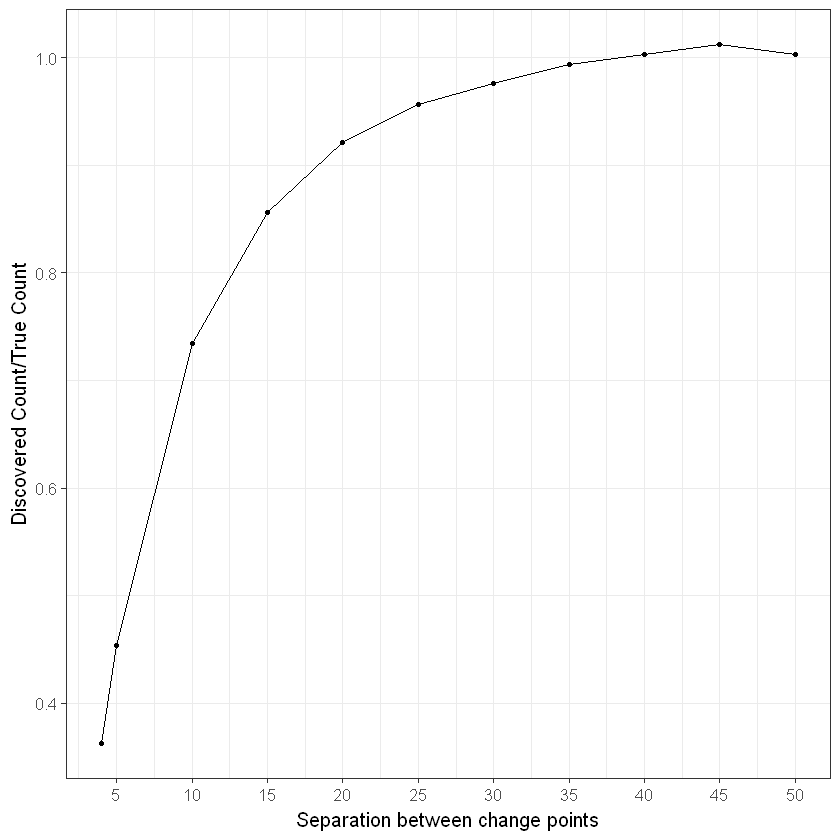

In [6]:
truevsdiscovered <- ggplot(resframe, aes(x = separations, y = fracdiscovered))+
geom_line(size = 0.5)+
geom_point(size=1)+
#geom_errorbar(aes(ymin=fracdiscovered-fracsd, ymax=fracdiscovered+fracsd), width=.1)+
theme_bw(12)+
scale_x_continuous(labels = seq(0,50,5), breaks = seq(0,50,5))+
labs(x = "Separation between change points", y = "Discovered Count/True Count")#+
#scale_y_continuous(labels = c(0,0.5,1,1.5), breaks = c(0,0.5,1,1.5))
truevsdiscovered

In [7]:
svglite(file = "truevsdiscovered.svg", width = 3.3, height = 3)
truevsdiscovered
dev.off()

png 
  2

Plot some example trajectories.

In [10]:
lowdensity <- read.csv("35_multicpt.csv")
examplelow <- lowdensity %>% filter(trajectory == 14)
rm(lowdensity)
mediumdensity <- read.csv("20_multicpt.csv")
examplemedium <- mediumdensity %>% filter(trajectory == 0)
rm(mediumdensity)
highdensity <- read.csv("10_multicpt.csv")
examplehigh <- highdensity %>% filter(trajectory == 0)
rm(highdensity)

In [12]:
outputlow <- listy[[8]] %>% filter(trajectory == 0)
outputmedium <- listy[[5]] %>% filter(trajectory == 0)
outputhigh <- listy[[3]] %>% filter(trajectory == 0)

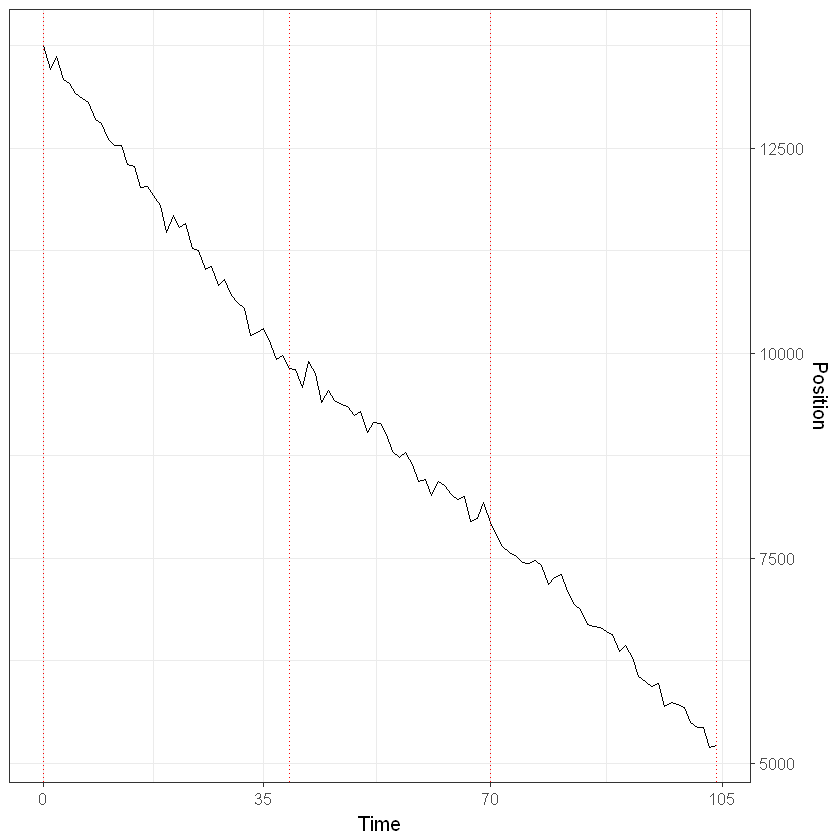

In [13]:
examplelowplot <- ggplot(examplelow, aes(x = time))+
            #geom_line(size = 0.5, aes(y = position), colour = "blue")+
            geom_line(size = 0.5, aes(y = nucleotides - 8800))+
            theme_bw(12)+
            scale_y_continuous(position = "right")+
            scale_x_continuous(breaks = c(0,34,69,105), labels = c(0, 35, 70, 105))+
            geom_vline(xintercept = outputlow$x2, linetype = "dotted", colour = "red")+
            geom_vline(xintercept = 0, linetype = "dotted", colour = "red")+
            labs(x = "Time", y = "Position")
examplelowplot

In [14]:
svglite(file = "examplelowplot_fig5.svg", width = 3.3, height = 3)
examplelowplot
dev.off()

png 
  2

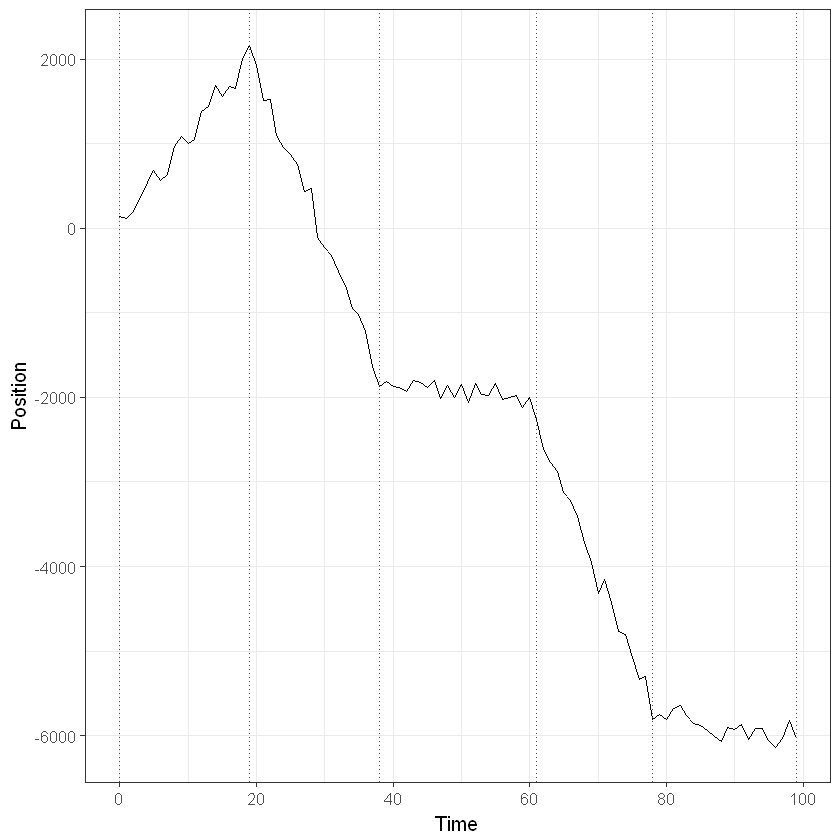

In [15]:
examplemediumplot <- ggplot(examplemedium, aes(x = time))+
            #geom_line(size = 0.5, aes(y = position), colour = "blue")+
            geom_line(size = 0.5, aes(y = nucleotides))+
            theme_bw(12)+
            scale_y_continuous(position = "left")+
            scale_x_continuous(breaks = c(0,20,40,60,80,100), labels = c(0,20,40,60,80,100))+
            geom_vline(xintercept = outputmedium$x2, linetype = "dotted", colour = "red")+
            geom_vline(xintercept = 0, linetype = "dotted", colour = "red")+
            labs(x = "Time", y = "Position")
examplemediumplot

In [16]:
svglite(file = "examplemediumplot_fig5.svg", width = 3.3, height = 3)
examplemediumplot
dev.off()

png 
  2

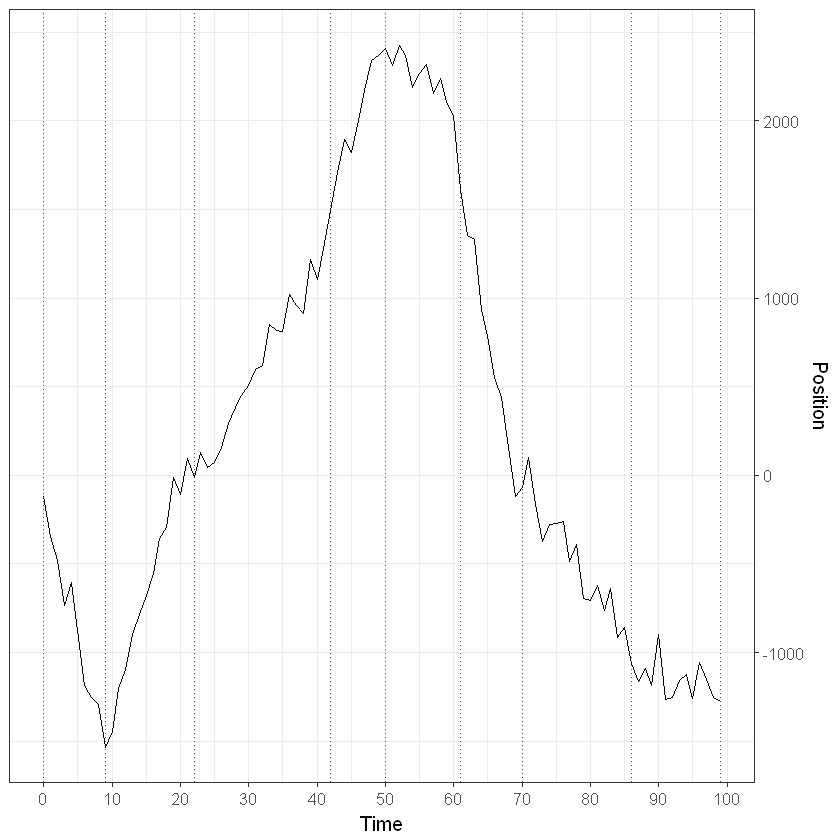

In [17]:
examplehighplot <- ggplot(examplehigh, aes(x = time))+
            #geom_line(size = 0.5, aes(y = position), colour = "blue")+
            geom_line(size = 0.5, aes(y = nucleotides))+
            theme_bw(12)+
            scale_y_continuous(position = "right")+
            scale_x_continuous(breaks = c(0,10,20,30,40,50,60,70,80,90,100), labels = c(0,10,20,30,40,50,60,70,80,90,100))+
            geom_vline(xintercept = outputhigh$x2, linetype = "dotted", colour = "red")+
            geom_vline(xintercept = 0, linetype = "dotted", colour = "red")+
            labs(x = "Time", y = "Position")
examplehighplot

In [18]:
svglite(file = "examplehighplot_fig5.svg", width = 3.3, height = 3)
examplehighplot
dev.off()

png 
  2